In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
order=pd.read_csv("/content/data_orders.csv")

In [72]:
offer=pd.read_csv("/content/data_offers.csv")

In [73]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [74]:
order.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [75]:
order[(order['is_driver_assigned_key'] == 1) & (order['m_order_eta'].isna())]


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds


In [76]:
pd.crosstab(
    order['is_driver_assigned_key'],
    order['m_order_eta'].isna(),
    margins=True
)

m_order_eta,False,True,All
is_driver_assigned_key,,,
0,0,7902,7902
1,2814,0,2814
All,2814,7902,10716


In [77]:
order['m_order_eta'] = order['m_order_eta'].fillna('No Driver Assigned')


In [78]:
order.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,No Driver Assigned,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,No Driver Assigned,3000583140877,9,0,NaN


In [79]:
order[(order['cancellations_time_in_seconds'].isna()) & (order['order_status_key']==4)]


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds


In [80]:
pd.crosstab(
    order['order_status_key'],
    order['cancellations_time_in_seconds'].isna(),
    margins=True
)


cancellations_time_in_seconds,False,True,All
order_status_key,,,
4,7307,0,7307
9,0,3409,3409
All,7307,3409,10716


In [81]:
order.isnull().sum()

,0
order_datetime,0
origin_longitude,0
origin_latitude,0
m_order_eta,0
order_gk,0
order_status_key,0
is_driver_assigned_key,0
cancellations_time_in_seconds,3409


In [82]:
order['cancellations_time_in_seconds'].fillna('No Cancellation',inplace=True)

/tmp/ipython-input-1868870220.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order['cancellations_time_in_seconds'].fillna('No Cancellation',inplace=True)
/tmp/ipython-input-1868870220.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Cancellation' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  order['cancellations_time_in_seconds'].fillna('No Cancellation',inplace=True)


In [83]:
order.isnull().sum()

,0
order_datetime,0
origin_longitude,0
origin_latitude,0
m_order_eta,0
order_gk,0
order_status_key,0
is_driver_assigned_key,0
cancellations_time_in_seconds,0


In [84]:
order['order_status_key'].unique()

array([4, 9])

In [85]:
order['is_driver_assigned_key'].unique()

array([1, 0])

In [86]:
for col in order.columns:
    print(f"{col}:", order[col].apply(type).value_counts(), "\n")


order_datetime: order_datetime
<class 'str'>    10716
Name: count, dtype: int64 

origin_longitude: origin_longitude
<class 'float'>    10716
Name: count, dtype: int64 

origin_latitude: origin_latitude
<class 'float'>    10716
Name: count, dtype: int64 

m_order_eta: m_order_eta
<class 'str'>      7902
<class 'float'>    2814
Name: count, dtype: int64 

order_gk: order_gk
<class 'int'>    10716
Name: count, dtype: int64 

order_status_key: order_status_key
<class 'int'>    10716
Name: count, dtype: int64 

is_driver_assigned_key: is_driver_assigned_key
<class 'int'>    10716
Name: count, dtype: int64 

cancellations_time_in_seconds: cancellations_time_in_seconds
<class 'float'>    7307
<class 'str'>      3409
Name: count, dtype: int64 



In [87]:
order['m_order_eta'] = pd.to_numeric(order['m_order_eta'], errors='coerce')


In [88]:
order['cancellations_time_in_seconds'] = pd.to_numeric(order['cancellations_time_in_seconds'], errors='coerce')


In [89]:
for col in order.columns:
    print(f"{col}:", order[col].apply(type).value_counts(), "\n")

order_datetime: order_datetime
<class 'str'>    10716
Name: count, dtype: int64 

origin_longitude: origin_longitude
<class 'float'>    10716
Name: count, dtype: int64 

origin_latitude: origin_latitude
<class 'float'>    10716
Name: count, dtype: int64 

m_order_eta: m_order_eta
<class 'float'>    10716
Name: count, dtype: int64 

order_gk: order_gk
<class 'int'>    10716
Name: count, dtype: int64 

order_status_key: order_status_key
<class 'int'>    10716
Name: count, dtype: int64 

is_driver_assigned_key: is_driver_assigned_key
<class 'int'>    10716
Name: count, dtype: int64 

cancellations_time_in_seconds: cancellations_time_in_seconds
<class 'float'>    10716
Name: count, dtype: int64 



In [90]:
order.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [91]:
order['eta_status'] = order['m_order_eta'].isna().map({True: 'No Estimated Time', False: 'Has ETA'})


In [92]:
order['cancellation_status'] = order['cancellations_time_in_seconds'].isna().map({
    True: 'Not Cancelled / No Time Recorded',
    False: 'Cancelled'
})

In [93]:
order.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,eta_status,cancellation_status
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,Has ETA,Cancelled
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,No Estimated Time,Cancelled
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,Has ETA,Cancelled
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,Has ETA,Cancelled
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,No Estimated Time,Not Cancelled / No Time Recorded


In [94]:
order.nunique()

,0
order_datetime,9921
origin_longitude,4638
origin_latitude,4507
m_order_eta,292
order_gk,10716
order_status_key,2
is_driver_assigned_key,2
cancellations_time_in_seconds,772
eta_status,2
cancellation_status,2


In [95]:
order.duplicated().sum()

np.int64(0)

In [96]:
order[['m_order_eta', 'cancellations_time_in_seconds']].describe()


,m_order_eta,cancellations_time_in_seconds
count,2814.000000,7307.000000
mean,441.415423,157.892021
std,288.006379,213.366963
min,60.000000,3.000000
25%,233.000000,45.000000
50%,368.500000,98.000000
75%,653.000000,187.500000
max,1559.000000,4303.000000


In [97]:
order['order_gk'].duplicated().sum()

np.int64(0)

1.Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

/tmp/ipython-input-3464091594.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


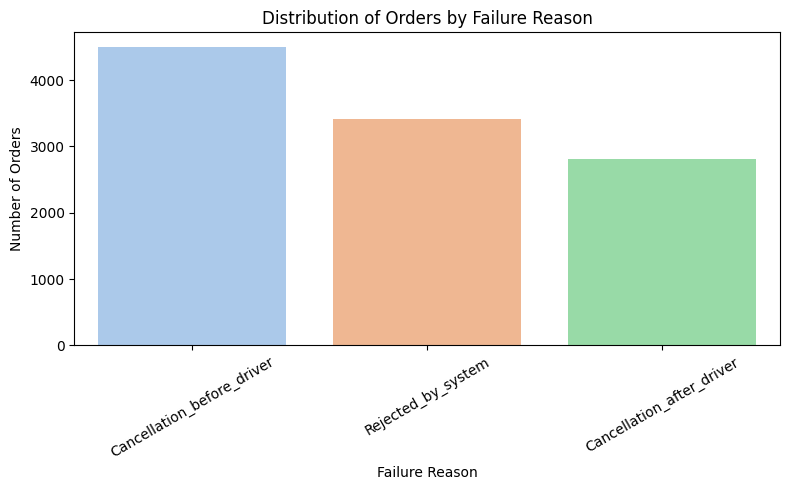

Category with highest number of failed orders: Cancellation_before_driver (4496 orders)


In [98]:
# Assuming your dataframe is called `order`
# Map status codes to readable names
status_map = {
    4: 'cancelled_by_client',
    9: 'rejected_by_system'
}

order['status_text'] = order['order_status_key'].map(status_map)

# Create failure reason column
def failure_reason(row):
    if row['status_text'] == 'cancelled_by_client':
        if row['is_driver_assigned_key'] == 0:
            return 'Cancellation_before_driver'
        else:
            return 'Cancellation_after_driver'
    elif row['status_text'] == 'rejected_by_system':
        return 'Rejected_by_system'
    else:
        return 'Other'

order['failure_reason'] = order.apply(failure_reason, axis=1)

# Count and plot
failure_counts = order['failure_reason'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(
    x=failure_counts.index,
    y=failure_counts.values,
    palette='pastel'
)
plt.xticks(rotation=30)
plt.title('Distribution of Orders by Failure Reason')
plt.ylabel('Number of Orders')
plt.xlabel('Failure Reason')
plt.tight_layout()
plt.show()

# Identify highest category
top_category = failure_counts.idxmax()
top_count = failure_counts.max()

print(f"Category with highest number of failed orders: {top_category} ({top_count} orders)")


/tmp/ipython-input-1850699331.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fail_counts, x='Failure Reason', y='Number of Orders', palette='viridis')


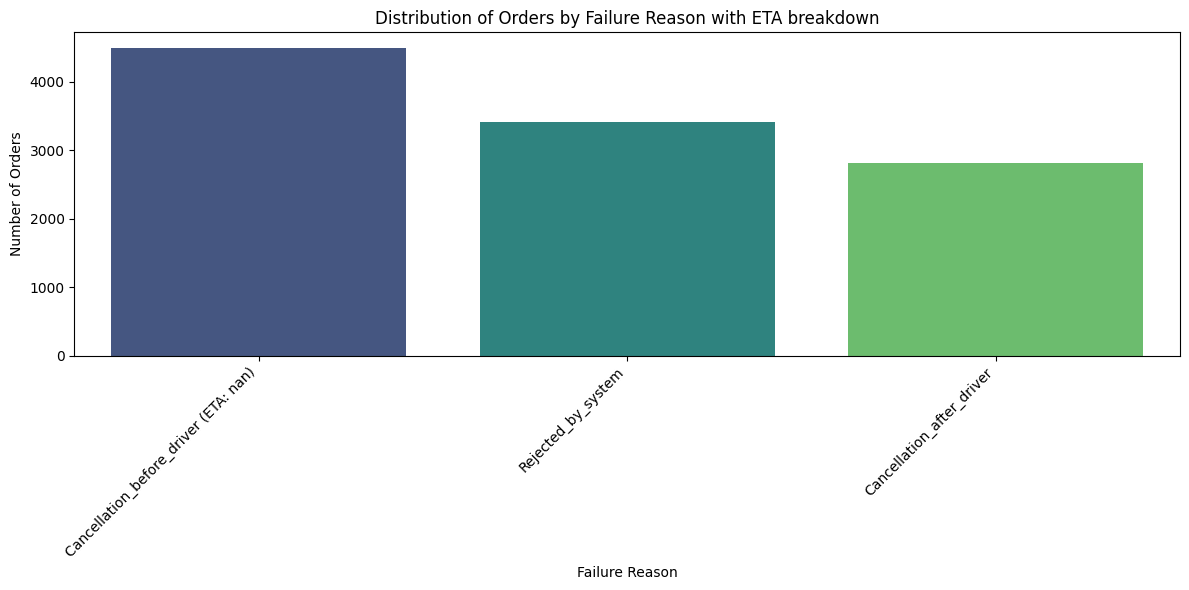

In [99]:
df = order.copy()

# Create a failure reason column
def categorize_failure(row):
    if row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 0:
        return 'Cancellation_before_driver'
    elif row['order_status_key'] == 9:
        return 'Rejected_by_system'
    elif row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 1:
        return 'Cancellation_after_driver'
    else:
        return 'Other'

df['failure_reason'] = df.apply(categorize_failure, axis=1)

# Group ETA into bins
df['eta_group'] = pd.cut(df['m_order_eta'], bins=[0,3,7,12,999], labels=['0-3','4-7','8-12','>12'])

# Merge ETA group into failure reason for cancellations before driver
df['failure_reason_grouped'] = df['failure_reason']
df.loc[df['failure_reason'] == 'Cancellation_before_driver', 'failure_reason_grouped'] = (
    'Cancellation_before_driver (ETA: ' + df['eta_group'].astype(str) + ')'
)

# Count
fail_counts = df['failure_reason_grouped'].value_counts().reset_index()
fail_counts.columns = ['Failure Reason', 'Number of Orders']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=fail_counts, x='Failure Reason', y='Number of Orders', palette='viridis')
plt.title('Distribution of Orders by Failure Reason with ETA breakdown')
plt.xlabel('Failure Reason')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most cancellations happened before a driver was assigned. In these cases, the ETA (estimated arrival time) was missing because no driver was found yet. This often means the customer didn’t want to wait or **found another ride faster**.

The other failures were either system rejections or cancellations after a driver was assigned.

2.Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [112]:
order['order_datetime'] = pd.to_datetime(order['order_datetime'])
order['hour'] = order['order_datetime'].dt.hour

# Map reasons
def failure_reason(row):
    if row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 0:
        return 'Cancellation_before_driver'
    elif row['order_status_key'] == 9:
        return 'Rejected_by_system'
    elif row['order_status_key'] == 4 and row['is_driver_assigned_key'] == 1:
        return 'Cancellation_after_driver'
    else:
        return None


order['failure_reason'] = order.apply(failure_reason, axis=1)


# Group by hour and reason
fail_by_hour_reason = order.groupby(['hour', 'failure_reason']).size().unstack(fill_value=0)

# pip install plotly  # (once)
import plotly.express as px

df_plot = (
    fail_by_hour_reason
    .reset_index()
    .melt(id_vars='hour', var_name='failure_reason', value_name='count')
)

fig = px.bar(
    df_plot, x='hour', y='count', color='failure_reason',
    barmode='stack', title='Number of Failed Orders by Hour and Reason'
)
fig.update_xaxes(dtick=1)
fig.update_traces(hovertemplate='Hour %{x}<br>%{legendgroup}: %{y}<extra></extra>')
fig.show()


The **most cancellations happened at 8 AM, followed by 9 PM**.

Possible reasons:

**8 AM (Morning Rush)**                                                           
**High demand during office hours** — many people request rides at the same time.

**Riders often use multiple ride**-hailing apps and cancel the one that’s slower or more expensive.

**Some cancellations are system**-driven due to driver unavailability.

**9 PM (Evening Return)**                                                            
Peak post-office commute time with high booking activity.

Riders may cancel after finding quicker or cheaper alternatives.


3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

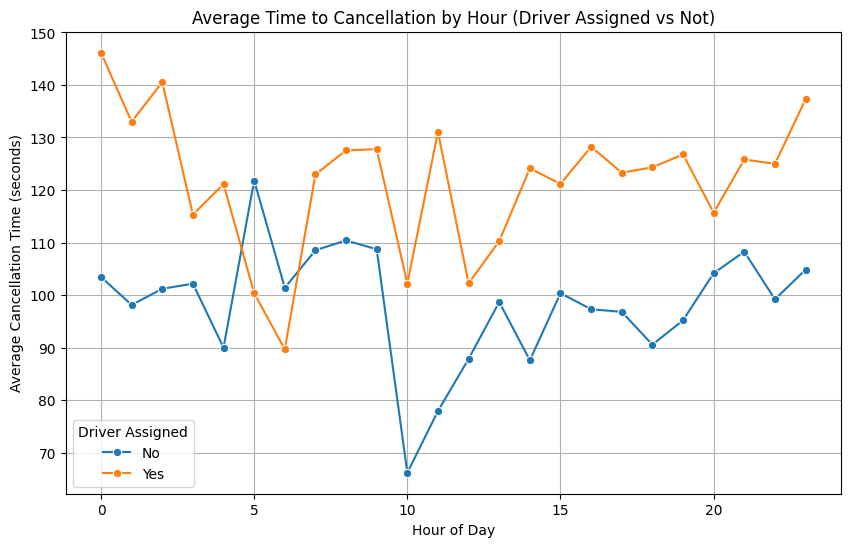

In [101]:
order['order_hour'] = pd.to_datetime(order['order_datetime']).dt.hour

# Remove NaNs in cancellation time
df_clean = order.dropna(subset=['cancellations_time_in_seconds']).copy()

# Outlier removal using IQR
Q1 = df_clean['cancellations_time_in_seconds'].quantile(0.25)
Q3 = df_clean['cancellations_time_in_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[
    (df_clean['cancellations_time_in_seconds'] >= lower_bound) &
    (df_clean['cancellations_time_in_seconds'] <= upper_bound)
]

# Group by hour & driver assignment
avg_cancel_time = df_clean.groupby(['order_hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().reset_index()

# Map driver assigned values to readable labels
avg_cancel_time['Driver Assigned'] = avg_cancel_time['is_driver_assigned_key'].map({0: 'No', 1: 'Yes'})

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_cancel_time, x='order_hour', y='cancellations_time_in_seconds', hue='Driver Assigned', marker='o')
plt.title("Average Time to Cancellation by Hour (Driver Assigned vs Not)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Cancellation Time (seconds)")
plt.grid(True)
plt.show()


Driver assigned = longer cancellation time, meaning customers tend to wait before deciding to cancel, possibly giving the driver a chance to arrive.

No driver assigned = shorter cancellation time, especially during busy commuting hours when speed matters.

Certain hours (5–6 AM and 10 AM) show rapid cancellations, likely driven by urgency.


4. Plot the distribution of average ETA by hours. How can this plot be explained?

/tmp/ipython-input-1510296157.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eta_clean = eta.groupby('order_hour', group_keys=False).apply(trim_iqr)


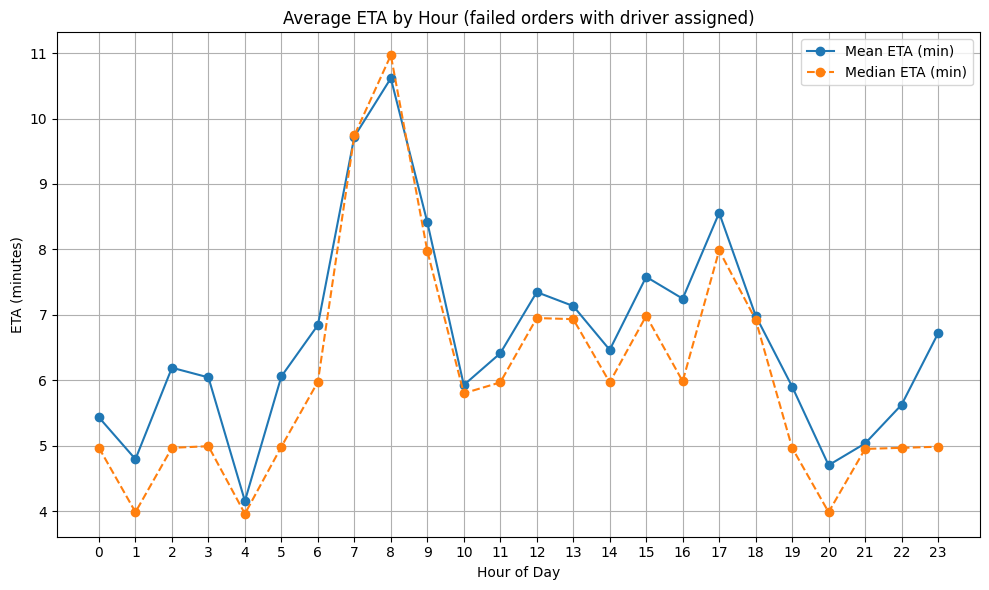

    order_hour  mean_eta_min  median_eta_min    n
8            8     10.615180       10.966667  314
7            7      9.722650        9.741667  156
17          17      8.558032        7.983333  166
9            9      8.414850        7.975000  156
15          15      7.579837        6.983333  143


In [102]:
# 1) Extract hour and ensure ETA is numeric
order['order_hour'] = pd.to_datetime(order['order_datetime'], format='%H:%M:%S', errors='coerce').dt.hour
order['m_order_eta'] = pd.to_numeric(order['m_order_eta'], errors='coerce')

eta = order[['order_hour','m_order_eta']].dropna().copy()  # only orders with driver ETA

# 2) Remove outliers PER HOUR using IQR
def trim_iqr(g):
    q1 = g['m_order_eta'].quantile(0.25)
    q3 = g['m_order_eta'].quantile(0.75)
    iqr = q3 - q1
    lb, ub = q1 - 1.5*iqr, q3 + 1.5*iqr
    return g[(g['m_order_eta'] >= lb) & (g['m_order_eta'] <= ub)]

eta_clean = eta.groupby('order_hour', group_keys=False).apply(trim_iqr)

# 3) Aggregate (mean & median). Convert to minutes for readability.
hourly = (eta_clean
          .groupby('order_hour')['m_order_eta']
          .agg(mean_eta='mean', median_eta='median', n='size')
          .reset_index())
hourly['mean_eta_min'] = hourly['mean_eta'] / 60.0
hourly['median_eta_min'] = hourly['median_eta'] / 60.0

# 4) Plot (mean & median)
plt.figure(figsize=(10,6))
plt.plot(hourly['order_hour'], hourly['mean_eta_min'], marker='o', label='Mean ETA (min)')
plt.plot(hourly['order_hour'], hourly['median_eta_min'], marker='o', linestyle='--', label='Median ETA (min)')
plt.xticks(range(24))
plt.title('Average ETA by Hour (failed orders with driver assigned)')
plt.xlabel('Hour of Day')
plt.ylabel('ETA (minutes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print the hours sorted by highest mean ETA
print(hourly[['order_hour','mean_eta_min','median_eta_min','n']].sort_values('mean_eta_min', ascending=False).head(5))


5.BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [103]:
!pip install h3 folium


In [104]:
import folium
import h3

In [105]:
# --- REQUIREMENTS (run once if needed) ---
# !pip install h3 folium branca

import pandas as pd
import numpy as np
import folium
import h3
import branca.colormap as cm

# 0) Basic hygiene: keep only rows with valid coordinates
g = order.dropna(subset=['origin_latitude', 'origin_longitude']).copy()

# 1) Build H3 res 8 cell IDs (v4 API)
g['hex8'] = g.apply(lambda r: h3.latlng_to_cell(r['origin_latitude'], r['origin_longitude'], 8), axis=1)

# 2) Aggregate per hex: total orders & fails (status 4 or 9)
hex_stats = (
    g.groupby('hex8')
     .agg(
         total_orders=('order_gk', 'count'),
         fails=('order_status_key', lambda s: s.isin([4, 9]).sum())
     )
     .reset_index()
)

# 3) Find how many hexes cover 80% of ALL orders
hex_sorted = hex_stats.sort_values('total_orders', ascending=False).reset_index(drop=True)
hex_sorted['cum_orders'] = hex_sorted['total_orders'].cumsum()
total_orders_all = hex_sorted['total_orders'].sum()
hex_sorted['cum_pct'] = hex_sorted['cum_orders'] / total_orders_all

# Take hexes up to (and including) the first one that reaches/exceeds 80%
top_hexes = hex_sorted[hex_sorted['cum_pct'] <= 0.80].copy()
if top_hexes.empty or (top_hexes['cum_pct'].iloc[-1] < 0.80 and len(hex_sorted) > len(top_hexes)):
    top_hexes = hex_sorted.iloc[:len(top_hexes)+1].copy()

num_hexes_80 = len(top_hexes)
print(f"Number of H3 res=8 hexes covering ~80% of orders: {num_hexes_80}")

# 4) Folium map centered on data centroid
center = [g['origin_latitude'].mean(), g['origin_longitude'].mean()]
m = folium.Map(location=center, zoom_start=12, tiles='cartodbpositron')

# Color scale by fails within the selected (top 80%) hexes
vmin = int(top_hexes['fails'].min())
vmax = int(top_hexes['fails'].max())
# Handle degenerate case (all same): widen by 1 to avoid zero-range color map
if vmin == vmax:
    vmin = max(0, vmin - 1)
    vmax = vmax + 1

colormap = cm.LinearColormap(
    colors=['#f7fbff', '#c6dbef', '#6baed6', '#2171b5', '#08306b'],
    vmin=vmin, vmax=vmax
).to_step(n=5)
colormap.caption = 'Failed orders per hex (status 4 or 9)'

# 5) Draw only the hexes that cover ~80% of orders
for _, row in top_hexes.iterrows():
    boundary = h3.cell_to_boundary(row['hex8'])  # list of (lat, lng)
    polygon = [(lat, lng) for lat, lng in boundary]
    folium.Polygon(
        locations=polygon,
        color=None,
        weight=0.7,
        fill=True,
        fill_opacity=0.6,
        fill_color=colormap(row['fails']),
        tooltip=(
            f"<b>Hex:</b> {row['hex8']}<br>"
            f"<b>Total orders:</b> {row['total_orders']}<br>"
            f"<b>Fails (4 or 9):</b> {row['fails']}<br>"
            f"<b>Cumulative coverage:</b> {row['cum_pct']:.1%}"
        )
    ).add_to(m)

colormap.add_to(m)

# 6) Save the interactive map
m.save("hex80_fails_map.html")
print("Map saved to: hex80_fails_map.html")


Number of H3 res=8 hexes covering ~80% of orders: 24
Map saved to: hex80_fails_map.html


In [106]:
from IPython.display import IFrame
IFrame(src='hex80_fails_map.html', width=800, height=600)
